<a href="https://colab.research.google.com/github/RafsanJany-44/NLP_Research/blob/master/tensoreflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/ajayshewale/Sentiment-Analysis-of-Text-Data-Tweets-/master/data/train.csv")

In [3]:
df.head()

,Id,Category,Tweet
0,635769805279248384,negative,Not Available
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [ ]:
df["Cat"]=0
for i in range(df.shape[0]):
  if df["Category"][i]=='neutral' or df["Category"][i]=='positive':
    df["Cat"][i]=1

In [4]:
df.shape

(5970, 4)

In [5]:
df.head()

,Id,Category,Tweet,Cat
0,635769805279248384,negative,Not Available,0
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,1
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",1
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,0
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,1


In [6]:
df.loc[:,["Tweet","Cat"]]

,Tweet,Cat
0,Not Available,0
1,IOS 9 App Transport Security. Mm need to check...,1
2,"Mar if you have an iOS device, you should down...",1
3,@jimmie_vanagon my phone does not run on lates...,0
4,Not sure how to start your publication on iOS?...,1
...,...,...
5965,@YouAreMyArsenal Wouldn't surprise me if we en...,1
5966,Rib injury for Zlatan against Russia is a big ...,1
5967,Noooooo! I was hoping to see Zlatan being Zlat...,1
5968,Not Available,1


In [7]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [31]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

C:\Users\RAZER\anaconda3\envs\Rattlesnake\lib\site-packages\tensorflow\python\framework\dtypes.py:585: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [32]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

C:\Users\RAZER\anaconda3\envs\Rattlesnake\lib\site-packages\tensorflow\python\framework\dtypes.py:585: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [30]:
vocab_size = 10000
embedding_dim = 16
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 3600


In [ ]:
def clean_tweets(tweet):

    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)

    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)

    # remove special characters
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)

    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)

    return tweet

In [ ]:
import re
df['Tweet'] = df['Tweet'].apply(clean_tweets)

In [ ]:

sentences = []
labels = []

for i in range(df.shape[0]):
    sentences.append(df['Tweet'][i])
    labels.append(df['Cat'][i])

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
set(labels)

{0, 1}

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
113/113 - 2s - loss: 0.6022 - accuracy: 0.8231 - val_loss: 0.4816 - val_accuracy: 0.8430 - 2s/epoch - 21ms/step
Epoch 2/30
113/113 - 1s - loss: 0.4502 - accuracy: 0.8375 - val_loss: 0.4339 - val_accuracy: 0.8430 - 642ms/epoch - 6ms/step
Epoch 3/30
113/113 - 1s - loss: 0.4406 - accuracy: 0.8375 - val_loss: 0.4342 - val_accuracy: 0.8430 - 680ms/epoch - 6ms/step
Epoch 4/30
113/113 - 1s - loss: 0.4393 - accuracy: 0.8375 - val_loss: 0.4336 - val_accuracy: 0.8430 - 677ms/epoch - 6ms/step
Epoch 5/30
113/113 - 1s - loss: 0.4377 - accuracy: 0.8375 - val_loss: 0.4327 - val_accuracy: 0.8430 - 630ms/epoch - 6ms/step
Epoch 6/30
113/113 - 1s - loss: 0.4360 - accuracy: 0.8375 - val_loss: 0.4322 - val_accuracy: 0.8430 - 618ms/epoch - 5ms/step
Epoch 7/30
113/113 - 1s - loss: 0.4344 - accuracy: 0.8375 - val_loss: 0.4319 - val_accuracy: 0.8430 - 682ms/epoch - 6ms/step
Epoch 8/30
113/113 - 1s - loss: 0.4329 - accuracy: 0.8375 - val_loss: 0.4314 - val_accuracy: 0.8430 - 659ms/epoch - 6ms/step
Ep

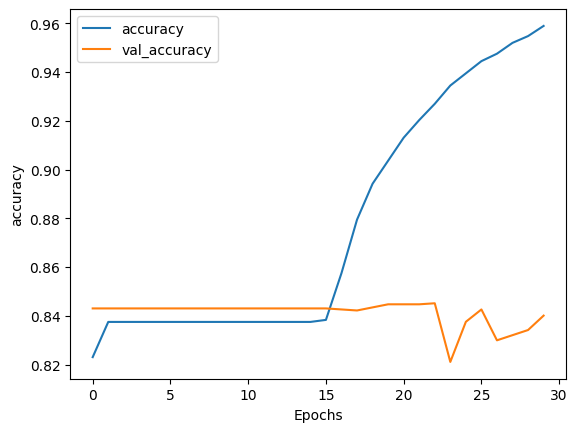

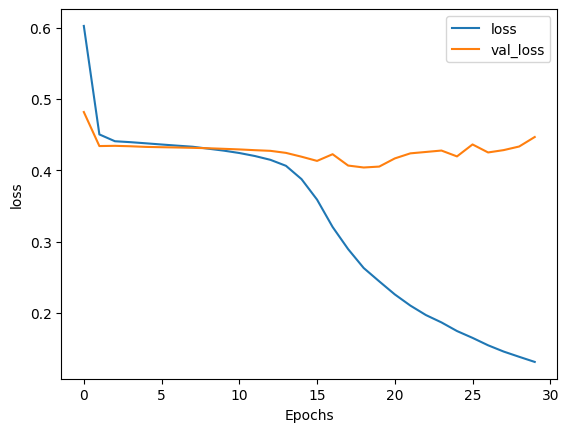

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

not available ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Mar if you have an iOS device you should download our app too 
1


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [ ]:
import keras
model.save("my_model.keras")
reconstructed_model = keras.models.load_model("my_model.keras")

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(reconstructed_model.predict(padded))

1/1 [==============================] - 0s 67ms/step
[[0.96390337]
 [0.9693349 ]]
